In [7]:
Boston <- read.csv("https://github.com/macbhaldar/Data-Science-R-Handbook/blob/main/Linear-Regression/Boston.csv")

In [10]:
?Boston

In [12]:
install.packages("caTools")

package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpMjUFHu\downloaded_packages


In [13]:
## Divide Dataset into two subsets
### Split the data into training and testing sets
set.seed(2)
library(caTools)
split<-sample.split(Boston$mdev, SplitRatio = 0.7)
split

Warning message:
"package 'caTools' was built under R version 3.6.3"

ERROR: Error in sample.split(Boston$mdev, SplitRatio = 0.7): Error in sample.split: 'SplitRatio' parameter has to be i [0, 1] range or [1, length(Y)] range


In [14]:
training_data<-subset(Boston,)
testing_data<-subset(Boston,)

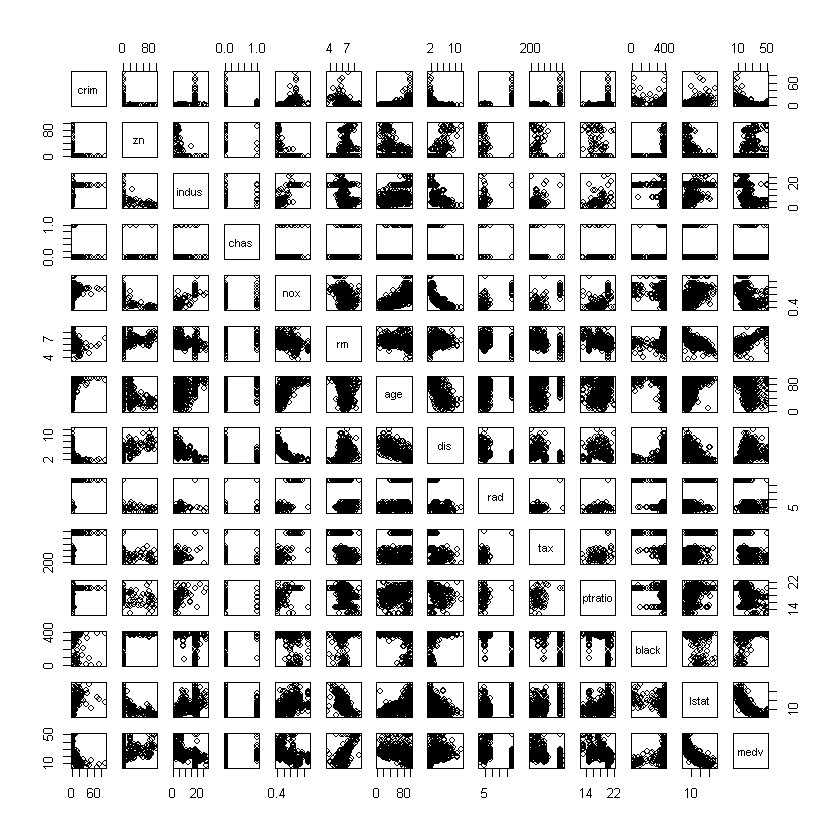

In [15]:
## Exploratory Analysis
plot(Boston)

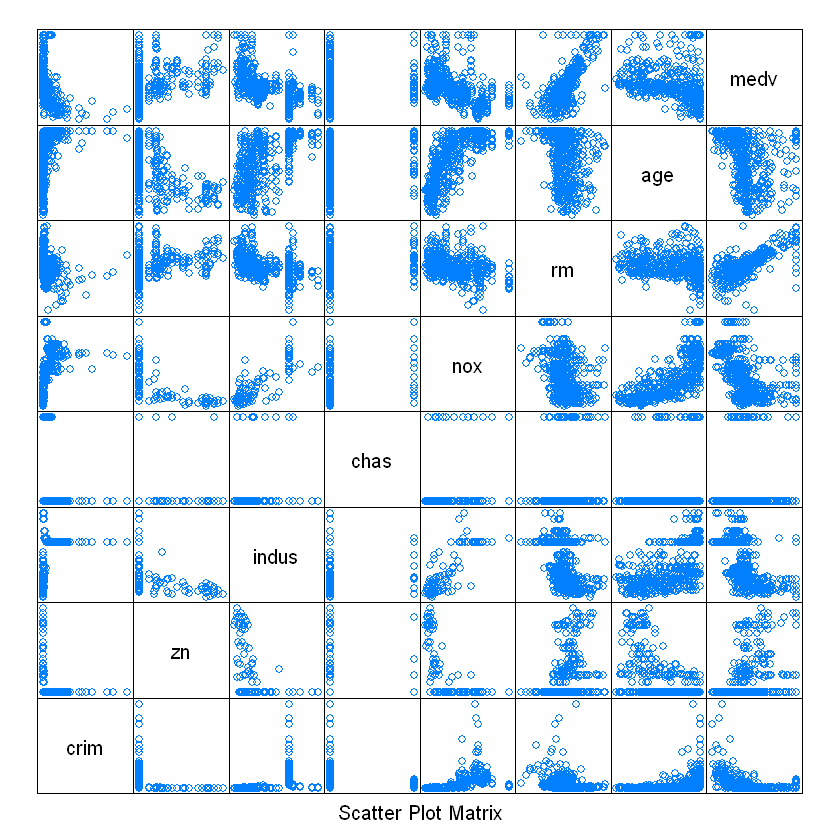

In [16]:
### Scatterplot matrix
attach(Boston)
library(lattice)
splom(~Boston[c(1:7,14)], groups=NULL, data=Boston, axis.line.tck=0, axis.text.alpha=0)

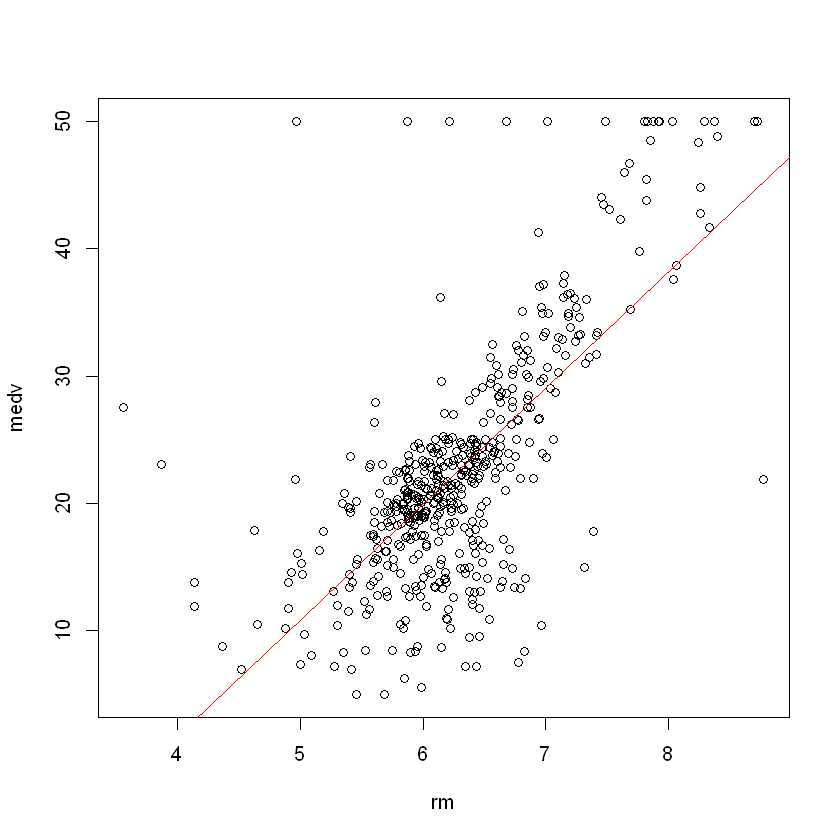

In [17]:
### Regression fit line (rm and medv)
plot(rm,medv)
abline(lm(medv~rm), col="red")

In [19]:
install.packages("corrplot")


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.92             FALSE



installing the source package 'corrplot'



corrplot 0.92 loaded


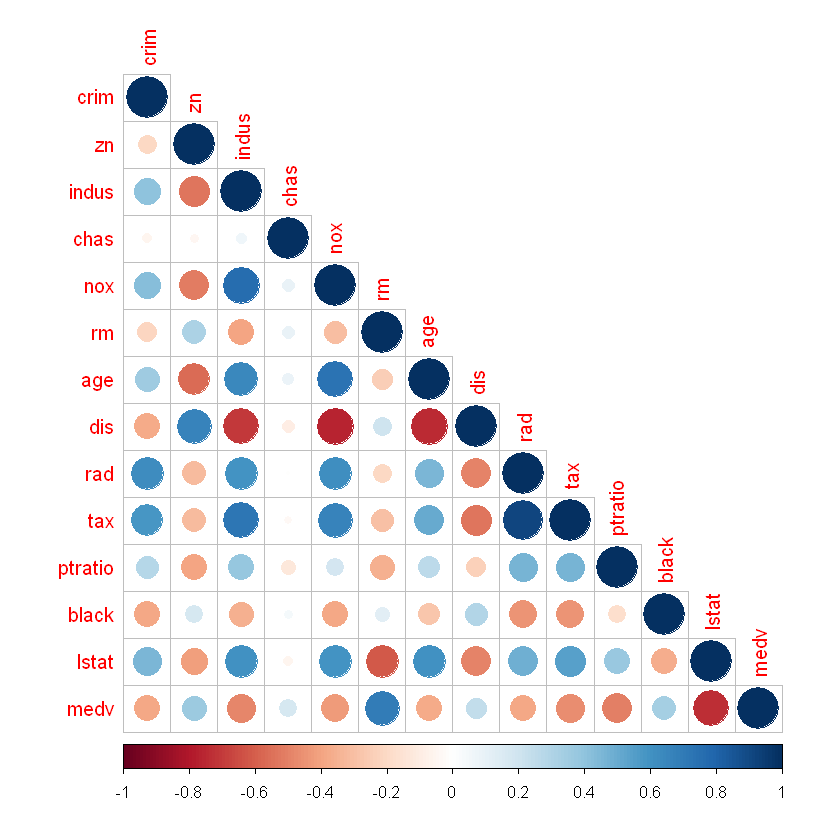

In [20]:
## Correlation Analysis
cr<-cor(Boston)
library(corrplot)
corrplot(cr,type="lower")

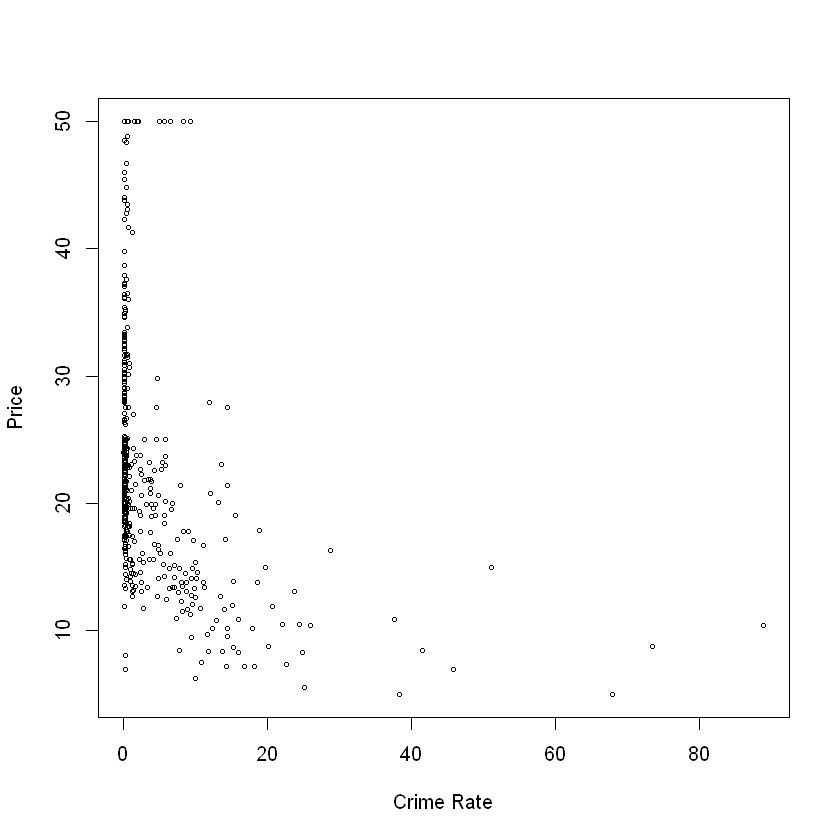

In [21]:
plot(Boston$crim, Boston$medv, cex=0.5, xlab="Crime Rate", ylab="Price")

In [22]:
install.packages("car")

also installing the dependencies 'glue', 'rprojroot', 'diffobj', 'brio', 'cli', 'desc', 'lifecycle', 'pkgload', 'praise', 'ps', 'rlang', 'waldo', 'testthat', 'SparseM', 'MatrixModels', 'minqa', 'nloptr', 'carData', 'abind', 'pbkrtest', 'quantreg', 'maptools', 'lme4'




  There are binary versions available but the source versions are later:
           binary source needs_compilation
glue        1.4.2  1.6.2              TRUE
diffobj     0.3.4  0.3.5              TRUE
brio        1.1.2  1.1.3              TRUE
cli         2.5.0  3.2.0              TRUE
desc        1.3.0  1.4.1             FALSE
lifecycle   1.0.0  1.0.1             FALSE
pkgload     1.2.1  1.2.4             FALSE
rlang      0.4.11  1.0.2              TRUE
waldo       0.2.5  0.4.0             FALSE
testthat    3.0.2  3.1.3              TRUE
nloptr    1.2.2.2  2.0.0              TRUE
carData     3.0-4  3.0-5             FALSE
quantreg     5.85   5.88              TRUE
maptools    1.1-1  1.1-3              TRUE
lme4       1.1-26 1.1-28              TRUE
car        3.0-10 3.0-12             FALSE

  Binaries will be installed
package 'glue' successfully unpacked and MD5 sums checked
package 'rprojroot' successfully unpacked and MD5 sums checked
package 'diffobj' successfully unpacked and 

installing the source packages 'desc', 'lifecycle', 'pkgload', 'waldo', 'carData', 'car'

Warning message in install.packages("car"):
"installation of package 'waldo' had non-zero exit status"

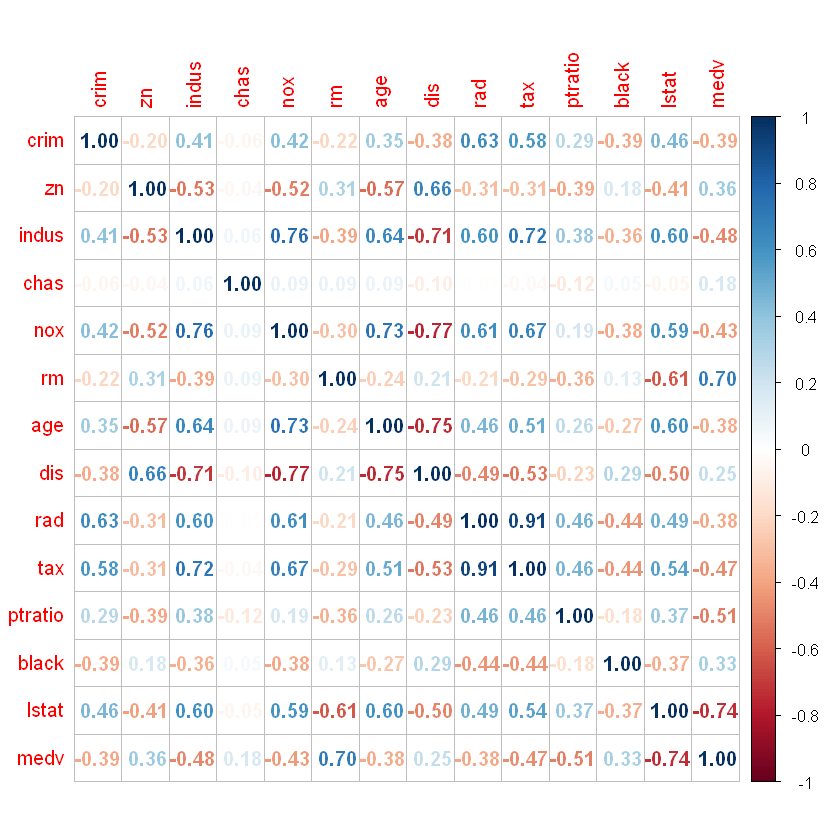

In [27]:
## Corrgram
cr<-cor(Boston)
library(corrplot)
corrplot(cr, method="number")

In [28]:
## Variance Inflation Factor (VIF)
library(car)
model<-lm(medv~., data = training_data)
vif(model)

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

In [29]:
summary(model)


Call:
lm(formula = medv ~ ., data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. co

In [30]:
model<-lm(medv~crim+zn+chas+nox+rm+dis+ptratio+black+lstat, data=training_data)

In [31]:
summary(model)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + ptratio + 
    black + lstat, data = training_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.803  -2.832  -0.625   1.454  27.766 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.507997   4.872538   6.056 2.76e-09 ***
crim         -0.061174   0.030377  -2.014 0.044567 *  
zn            0.042032   0.013422   3.131 0.001842 ** 
chas          3.029924   0.868349   3.489 0.000527 ***
nox         -16.088513   3.232702  -4.977 8.93e-07 ***
rm            4.149667   0.407685  10.179  < 2e-16 ***
dis          -1.431665   0.188603  -7.591 1.59e-13 ***
ptratio      -0.838640   0.117342  -7.147 3.19e-12 ***
black         0.008292   0.002688   3.084 0.002153 ** 
lstat        -0.525004   0.048351 -10.858  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.833 on 496 degrees of freedom
Multiple R-squared:  0.7288,	Adjusted R-square

In [35]:
predic<-predict(model,testing_data)
predic

1          2          3          4          5          6          7 
30.8823574 25.0592229 30.8785942 28.5438569 27.9239757 24.9910119 22.5916839 
         8          9         10         11         12         13         14 
19.1765912 10.9944350 18.5510987 18.7363102 21.1934505 20.4735486 20.1036346 
        15         16         17         18         19         20         21 
19.8747801 19.8047784 21.1173421 17.4585633 16.6560022 18.8459321 12.9274796 
        22         23         24         25         26         27         28 
18.1912174 16.4220814 14.2738307 16.1909883 13.8940402 15.9684335 15.3680502 
        29         30         31         32         33         34         35 
20.2647042 21.6688428 11.9398765 18.6552949  9.5149766 14.7466967 14.4361853 
        36         37         38         39         40         41         42 
23.3920756 21.9144566 22.7027977 22.5599872 31.0726148 34.0808842 27.8383846 
        43         44         45         46         47         48         49 
24.8174055 24.2267963 22.4899895 21.4852025 19.8472153 17.5382188  8.3889088 
        50         51         52         53         54         55         56 
16.5920142 20.4398669 23.1707241 27.0164282 23.2341176 17.8427552 30.1827218 
        57         58         59         60         61         62         63 
25.5701498 31.9843199 20.6894262 19.8643666 16.5915534 17.2879417 22.9461798 
        64         65         66         67         68         69         70 
21.6682994 23.2586855 30.4381801 25.4261381 21.7208397 17.9235346 21.3890571 
        71         72         73         74         75         76         77 
25.4686470 21.8567727 24.6972960 24.2634542 26.4490605 24.9115887 23.8568574 
        78         79         80         81         82         83         84 
24.2288910 22.1988456 23.2249948 28.4649144 26.9927485 25.9508276 24.9240298 
        85         86         87         88         89         90         91 
24.6764532 27.7494306 21.9200722 25.6452487 31.2908754 31.4882127 27.5378589 
        92         93         94         95         96         97         98 
27.8204213 28.4290678 28.5060100 26.4409092 29.2101740 25.1118578 36.8060876 
        99        100        101        102        103        104        105 
36.0832636 33.0600417 25.8708979 26.9105377 21.2987353 21.3961602 22.5135307 
       106        107        108        109        110        111        112 
19.4901082 18.1401402 21.8100894 23.8237941 20.8829341 21.7757214 27.7513960 
       113        114        115        116        117        118        119 
21.7044103 21.7167181 26.2295445 21.4280016 24.4315437 24.6859307 21.3301779 
       120        121        122        123        124        125        126 
21.7032926 20.9469816 21.5465163 19.6069415 15.3801882 19.5761721 21.5360824 
       127        128        129        130        131        132        133 
13.5626990 16.9639628 20.9724407 15.8551804 22.0948365 21.4705015 22.1236574 
       134        135        136        137        138        139        140 
17.6247757 15.2517180 19.2901898 17.7749801 21.4094573 15.6476030 18.3912420 
       141        142        143        144        145        146        147 
15.5178622  5.5819638 15.7325570 13.0057349  9.3293638 13.2657182 16.8803330 
       148        149        150        151        152        153        154 
 9.1164231 10.4465100 15.6971145 21.8419437 19.0818882 21.1040666 18.2841705 
       155        156        157        158        159        160        161 
23.7628002 21.8545371 14.6696475 34.0987205 29.5788567 26.7068199 33.6818505 
       162        163        164        165        166        167        168 
37.8084865 42.0407827 43.5195116 25.2989819 26.1566512 38.4167195 23.7645362 
       169        170        171        172        173        174        175 
27.1567804 27.4171424 23.1265468 24.8558794 22.3567569 28.7447689 26.0204263 
       176        177        178        179        180        181        182 
30.5000959 25.2214327 28.811605

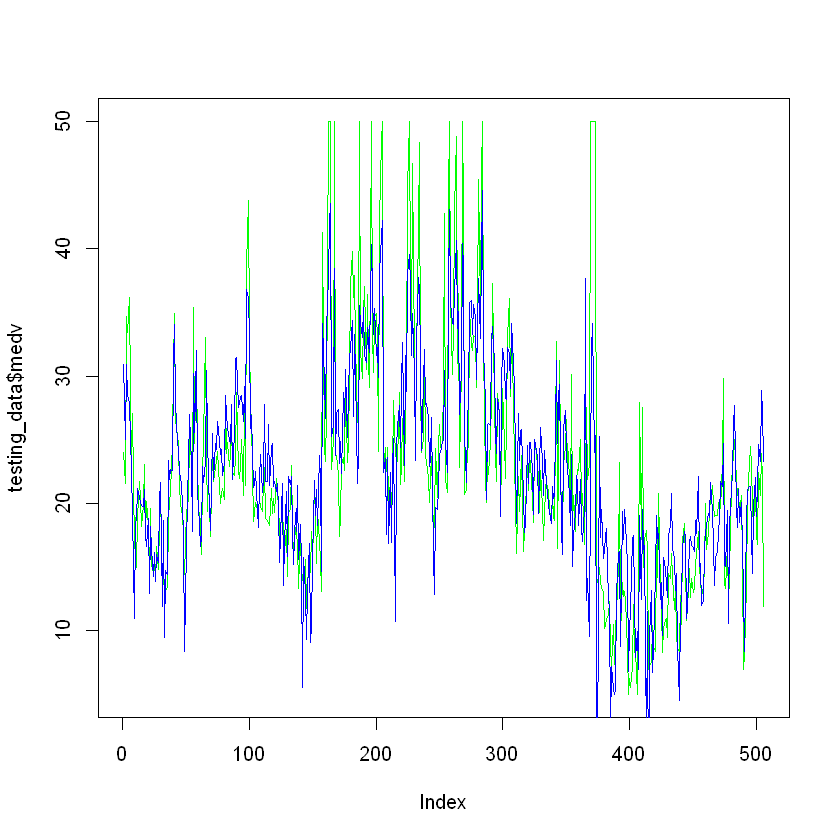

In [36]:
## Model Validation
### green line represent actual price and blue line represent predictive model generated for data
plot(testing_data$medv, type='l', lty=1.8, col="green")
lines(predic, type="l", col="blue")